# Vector overlay operations

Vector overlay operations are common in GIS in which two or more vector layers are combined to produce new geometries. When working with multiple spatial datasets (especially polygon or line layers), you might need to create new shapes based on places where the layers overlap (or do not overlap) with each other. The idea of spatial overlay has been around already for very long time ({cite}`keeble_1952`), as being able to combine and analyse multiple layers of spatial data together has been an important task e.g. for various spatial planning processes, including e.g. suitability analyses, environment impact assessment, or when doign zoning and landuse plans ({cite}`masser_1999`). Typical overlay operations include union, intersection, and difference (**Figure 6.50**). These are named after the result of the combination of two or more input layers which produce at least one (or more) output layer. Being able to combine spatial data layers like this is an important feature in most GIS tools. These manipulations are also often called as set operations.

The basic idea of vector overlay operations is demonstrated in **Figure 6.50** but it is good to keep in mind that overlays operate at the GeoDataFrame level, not on individual geometries, and the properties from both are retained. In effect, for every shape in the left GeoDataFrame, this operation is executed against every other shape in the right GeoDataFrame

![_**Figure 6.50**. Typical vector overlay operations between two geographic layers (circle and rectangles). _](../img/vector_overlay_idea.png)

_**Figure 6.50**. Typical vector overlay operations between two geographic layers (circle and rectangles)._


Refs:

 Steinitz, Carl; Parker, Paul; Jordan, Lawrie (1976). "Hand-Drawn Overlays: Their History and Prospective Uses". Landcape Architecture. 66 (5 (September)): 444–455.
 Manning, Warren (1913). "The Billerica Town Plan". Landscape Architecture. 3: 108–118.
 Tyrwhitt, Jacqueline (1950). "Surveys for Planning". In APRR (ed.). Town and Country Planning Textbook. Architectural Press.
 McHarg, Ian (1969). Design with Nature. p. 34. ISBN 0-471-11460-X.
 Tomlinson, Roger (1968). "A Geographic Information System for Regional Planning". In Stewart, G.A. (ed.). Land Evaluation: Papers of a CSIRO Symposium. Macmillan of Australia. pp. 200–210.
 Tomlinson, Roger F.; Calkins, Hugh W.; Marble, Duane F. (1976). Computer handling of geographical data. UNESCO Press.
 Goodchild, Michael F. (1978). "Statistical aspects of the polygon overlay problem". Harvard papers on geographic information systems. 6.
 Peucker, Thomas K.; Chrisman, Nicholas (1975). "Cartographic Data Structures". The American Cartographer. 2 (1): 55–69. doi:10.1559/152304075784447289.
 Dougenik, James (1979). "WHIRLPOOL: A geometric processor for polygon coverage data" (PDF). Proceedings of the International Symposium on Cartography and Computing (Auto-Carto IV). 2: 304–311.
 Bolstad, Paul (2008). GIS Fundamentals: A First Text on Geographic Information Systems (3rd ed.). Eider Press. p. 352.
 Chrisman, Nicholas R. (2002). Exploring Geographic Information Systems (2nd ed.). Wiley. pp. 125–137.
 Lo, C.P.; Yeung, Albert K.W. (2002). Concepts and Techniques of Geographic Information Systems. Prentice Hall. p. 211. ISBN 0-13-080427-4.
 Esri. "Intersect (Analysis)". ArcGIS Pro Documentation. Retrieved 29 October 2021.
 QGIS. "Line intersections". QGIS 3.16 documentation.
 Morehouse, Scott (1985). "ARC/INFO: A geo-relational model for spatial information" (PDF). Proceedings of the International Symposium on Cartography and Computing (Auto-Carto VII): 388.
 Westervelt, James (2004). "GRASS Roots" (PDF). Proceedings of the FOSS/GRASS Users Conference. Retrieved 26 October 2021.

In the following, we will carry out vector overlay operations to select those polygon cells of a grid dataset that lie within the city limits of Helsinki. For this exercis´e, we use two input data sets: a grid of statistical polygons with the travel time to the Helsinki railway station, covering the entire metropolitan area (helsinki_region_travel_times_to_railway_station.gpkg) and a polygon data set (with one feature) of the area the municipality of Helsinki covers (helsinki_municipality.gpkg). Both files are in logically named subfolders of the DATA_DIRECTORY.

In [10]:
import os

os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

# File paths
border_fp = "data/Helsinki/Helsinki_borders.shp"
grid_fp = "data/Helsinki/TravelTimes_to_5975375_RailwayStation.shp"

# Read files
grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

Let's do a quick overlay visualization of the two layers:

<AxesSubplot: >

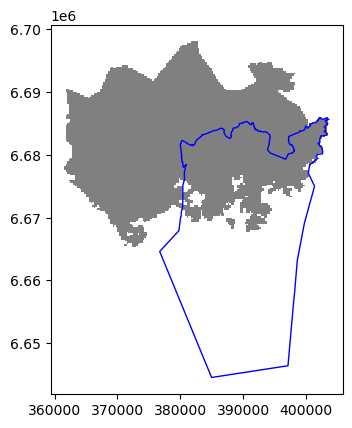

In [2]:
# Plot the layers
ax = grid.plot(facecolor="gray")
hel.plot(ax=ax, facecolor="None", edgecolor="blue")

_**Figure 6.32**. ADD PROPER FIGURE CAPTION!._

Here the grey area is the Travel Time Matrix - a data set that contains  13231 grid squares (13231 rows of data) that covers the Helsinki region, and the blue area represents the municipality of Helsinki. Our goal is to conduct an overlay analysis and select the geometries from the grid polygon layer that intersect with the Helsinki municipality polygon.

When conducting overlay analysis, it is important to first check that the CRS of the layers match. The overlay visualization indicates that everything should be ok (the layers are plotted nicely on top of each other). However, let's still check if the crs match using Python:

In [3]:
# Check the crs of the municipality polygon
print(hel.crs)

EPSG:3067


In [4]:
# Ensure that the CRS matches, if not raise an AssertionError
assert hel.crs == grid.crs, "CRS differs between layers!"

Indeed, they do. We are now ready to conduct an overlay analysis between these layers. 

We will create a new layer based on grid polygons that `intersect` with our Helsinki layer. We can use a function called `overlay()` to conduct the overlay analysis that takes as an input 1) first GeoDataFrame, 2) second GeoDataFrame, and 3) parameter `how` that can be used to control how the overlay analysis is conducted (possible values are `'intersection'`, `'union'`, `'symmetric_difference'`, `'difference'`, and `'identity'`):

In [5]:
intersection = gpd.overlay(grid, hel, how="intersection")

Let's plot our data and see what we have:

<AxesSubplot: >

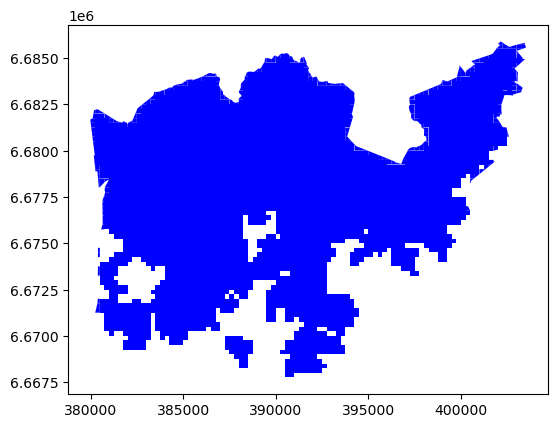

In [6]:
intersection.plot(color="b")

_**Figure 6.33**. ADD PROPER FIGURE CAPTION!._

As a result, we now have only those grid cells that intersect with the Helsinki borders. If you look closely, you can also observe that **the grid cells are clipped based on the boundary.**

- What about the data attributes? Let's see what we have:


In [7]:
intersection.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402024.224 6685750.000, 402003.328 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403148.515 6685750.000, 403243.781 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((401900.425 6685500.000, 402000.000 6..."


As we can see, due to the overlay analysis, the dataset contains the attributes from both input layers.

Let's save our result grid as a GeoJSON file that is commonly used file format nowadays for storing spatial data.

In [8]:
# Output filepath
outfp = "data/Helsinki/TravelTimes_to_5975375_RailwayStation_Helsinki.geojson"

# Use GeoJSON driver
intersection.to_file(outfp, driver="GeoJSON")

There are many more examples for different types of overlay analysis in [Geopandas documentation](http://geopandas.org/set_operations.html) where you can go and learn more.


In [84]:
import geopandas as gpd

postal_areas = gpd.read_file("data/Helsinki/Helsinki_centre_postal_areas.gpkg")
railway_station = gpd.read_file("data/Helsinki/Helsinki_railway_station.gpkg")
#railway_station = railway_station.to_crs(epsg=3067)
#railway_station.to_file("data/Helsinki/Helsinki_railway_station.gpkg")

In [85]:
postal_areas.head()

,posti_alue,he_vakiy,index_right,density,geometry
0,00100,18284.0,0,7769.586237,"MULTIPOLYGON (((385653.893 6671591.048, 385573..."
1,00120,7108.0,0,17168.685515,"MULTIPOLYGON (((385316.092 6671076.984, 385279..."
2,00130,1508.0,0,3515.476578,"MULTIPOLYGON (((386212.111 6671061.262, 386176..."
3,00140,7865.0,0,8440.281536,"MULTIPOLYGON (((386577.050 6670280.544, 386552..."
4,00150,9496.0,0,6944.933965,"MULTIPOLYGON (((384846.102 6669565.816, 384823..."


In [86]:
railway_station.head()

,name,id,geometry
0,Helsinki Railway station,0,POINT (385738.777 6672297.759)


In [93]:
station_buffer = railway_station.copy()
station_buffer["geometry"] = station_buffer.buffer(3000)

In [99]:
m = postal_areas.explore(tiles="CartoDB Positron")
m = station_buffer.explore(m=m, color="red")
m

In [122]:
import matplotlib.pyplot as plt

def plot_vector_overlay(gdf1, gdf2, result, title):
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(8,5))

    ax1 = gdf1.plot(ax=ax1)
    ax1 = gdf2.plot(ax=ax1, color="red", alpha=0.3)
    
    result.plot(ax=ax2)
    
    ax2.set_xlim(379282.2011, 390161.5504)
    ax2.set_ylim(6664478.5683, 6677328.8306)
    
    fig.suptitle(title, fontsize=16)
    ax1.axis("off")
    ax2.axis("off")
    plt.tight_layout()
    return fig, ax1, ax2


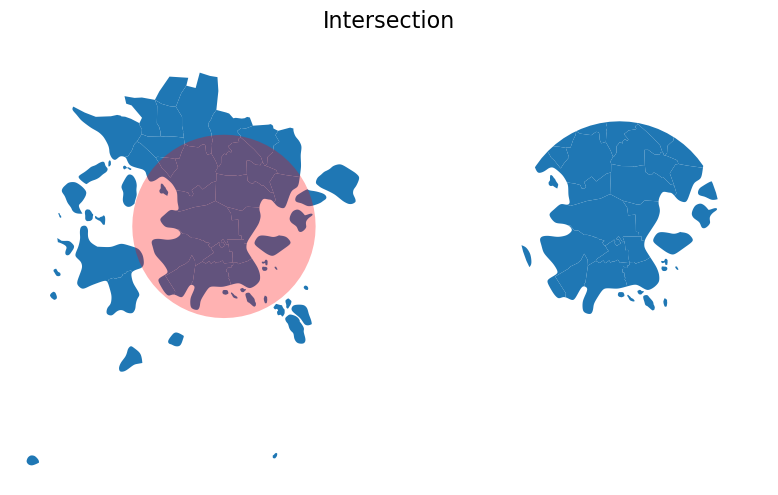

In [124]:

# Intersection
intersection = postal_areas.overlay(station_buffer, how="intersection")

fig, ax1, ax2 = plot_vector_overlay(gdf1=postal_areas, 
                                    gdf2=station_buffer, 
                                    result=intersection,
                                    title="Intersection")

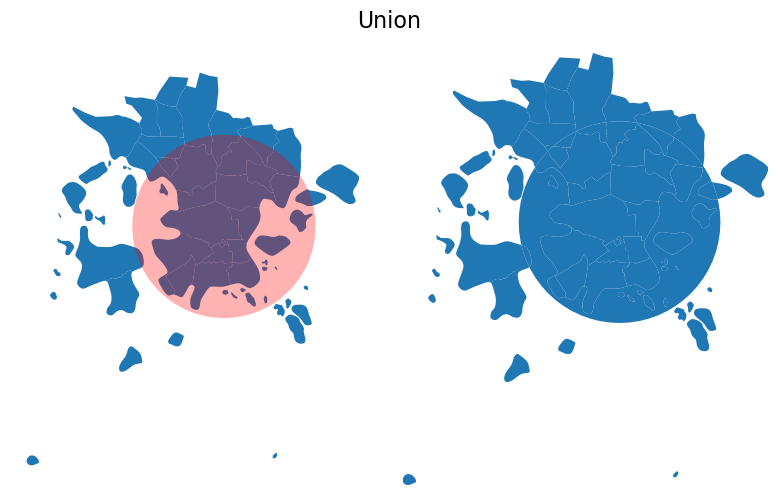

In [125]:
# Union
union = postal_areas.overlay(station_buffer, how="union")
                
fig, ax1, ax2 = plot_vector_overlay(gdf1=postal_areas, 
                                    gdf2=station_buffer, 
                                    result=union,
                                    title="Union")

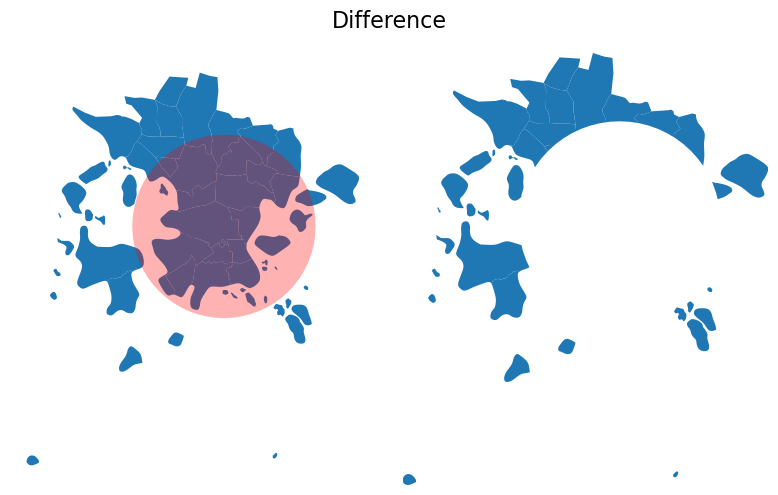

In [126]:
# Difference
difference = postal_areas.overlay(station_buffer, how="difference")
                
fig, ax1, ax2 = plot_vector_overlay(gdf1=postal_areas, 
                                    gdf2=station_buffer, 
                                    result=difference,
                                    title="Difference")

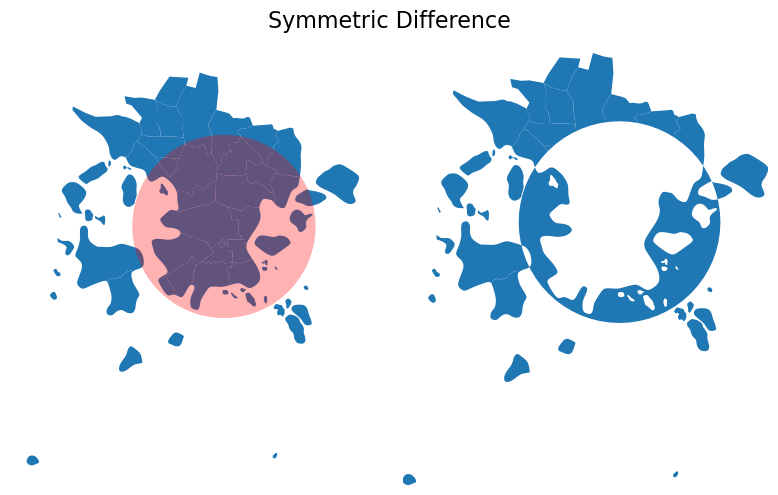

In [127]:
# Symmetric Difference
symmetric_difference = postal_areas.overlay(station_buffer, how="symmetric_difference")
                
fig, ax1, ax2 = plot_vector_overlay(gdf1=postal_areas, 
                                    gdf2=station_buffer, 
                                    result=symmetric_difference,
                                    title="Symmetric Difference")

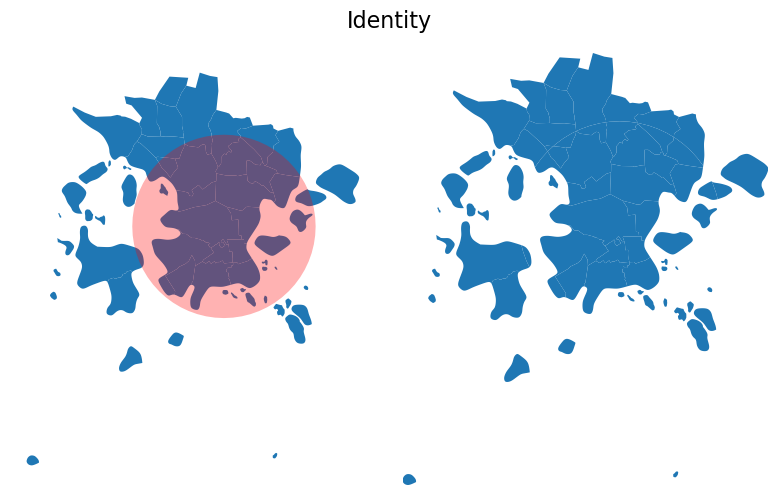

In [128]:
# Identity 
identity = postal_areas.overlay(station_buffer, how="identity")
                
fig, ax1, ax2 = plot_vector_overlay(gdf1=postal_areas, 
                                    gdf2=station_buffer, 
                                    result=identity,
                                    title="Identity")

Computes a geometric intersection of the input features and identity features. The input features or portions thereof that overlap identity features will get the attributes of those identity features.

In [136]:
identity.explore()